In [1]:
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")


C:\Users\hp\AppData\Local\Temp\ipykernel_27880\324809657.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:

df = pd.read_csv('RELIANCE.NS.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-06,2215.199219,2237.905029,2215.199219,2223.229248,2215.403564,5085958
1,2023-03-08,2223.229248,2232.736328,2201.354248,2231.213379,2223.359375,7891328
2,2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564
3,2023-03-10,2161.203857,2163.511230,2136.790283,2143.851318,2136.304932,6667045
4,2023-03-13,2149.666260,2163.511230,2099.824219,2108.592773,2101.170410,6385796
...,...,...,...,...,...,...,...
242,2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488
243,2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463
244,2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210
245,2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902,3000.399902,3553834


In [3]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,2215.199219,2237.905029,2215.199219,2223.229248,2215.403564,5085958
2023-03-08,2223.229248,2232.736328,2201.354248,2231.213379,2223.359375,7891328
2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564
2023-03-10,2161.203857,2163.511230,2136.790283,2143.851318,2136.304932,6667045
2023-03-13,2149.666260,2163.511230,2099.824219,2108.592773,2101.170410,6385796
...,...,...,...,...,...,...
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488
2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210


In [4]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 


,Open-Close,High-Low
Date,,
2023-03-06,-8.030029,22.705810
2023-03-08,-7.984131,31.382080
2023-03-09,52.380371,57.041260
2023-03-10,17.352539,26.720947
2023-03-13,41.073487,63.687011


In [5]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]


In [7]:
# Support vector classifier 
cls = SVC().fit(X_train, y_train)


In [8]:
df['Predicted_Signal'] = cls.predict(X)


In [9]:
# Calculate daily returns 
df['Return'] = df.Close.pct_change()


In [10]:
# Calculate strategy returns 
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [14]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum() 
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2023-03-06,2215.199219,2237.905029,2215.199219,2223.229248,2215.403564,5085958,-8.030029,22.705810,1,NaN,NaN,NaN,NaN
2023-03-08,2223.229248,2232.736328,2201.354248,2231.213379,2223.359375,7891328,-7.984131,31.382080,1,0.003591,0.003591,0.003591,0.003591
2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564,52.380371,57.041260,0,-0.024035,-0.024035,-0.020443,-0.020443
2023-03-10,2161.203857,2163.511230,2136.790283,2143.851318,2136.304932,6667045,17.352539,26.720947,1,-0.015492,-0.000000,-0.035936,-0.020443
2023-03-13,2149.666260,2163.511230,2099.824219,2108.592773,2101.170410,6385796,41.073487,63.687011,0,-0.016446,-0.016446,-0.052382,-0.036890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488,8.399902,48.899902,1,0.003555,0.000000,0.289942,0.329567
2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463,-57.250000,75.000000,1,0.021444,0.021444,0.311386,0.351010
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210,-33.850098,50.449951,1,0.010237,0.010237,0.321623,0.361248


In [11]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2023-03-06,2215.199219,2237.905029,2215.199219,2223.229248,2215.403564,5085958,-8.030029,22.705810,1,NaN,NaN,NaN
2023-03-08,2223.229248,2232.736328,2201.354248,2231.213379,2223.359375,7891328,-7.984131,31.382080,1,0.003591,0.003591,0.003591
2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564,52.380371,57.041260,0,-0.024035,-0.024035,-0.020443
2023-03-10,2161.203857,2163.511230,2136.790283,2143.851318,2136.304932,6667045,17.352539,26.720947,1,-0.015492,-0.000000,-0.035936
2023-03-13,2149.666260,2163.511230,2099.824219,2108.592773,2101.170410,6385796,41.073487,63.687011,0,-0.016446,-0.016446,-0.052382
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488,8.399902,48.899902,1,0.003555,0.000000,0.289942
2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463,-57.250000,75.000000,1,0.021444,0.021444,0.311386
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210,-33.850098,50.449951,1,0.010237,0.010237,0.321623


In [15]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum() 
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2023-03-06,2215.199219,2237.905029,2215.199219,2223.229248,2215.403564,5085958,-8.030029,22.705810,1,NaN,NaN,NaN,NaN
2023-03-08,2223.229248,2232.736328,2201.354248,2231.213379,2223.359375,7891328,-7.984131,31.382080,1,0.003591,0.003591,0.003591,0.003591
2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564,52.380371,57.041260,0,-0.024035,-0.024035,-0.020443,-0.020443
2023-03-10,2161.203857,2163.511230,2136.790283,2143.851318,2136.304932,6667045,17.352539,26.720947,1,-0.015492,-0.000000,-0.035936,-0.020443
2023-03-13,2149.666260,2163.511230,2099.824219,2108.592773,2101.170410,6385796,41.073487,63.687011,0,-0.016446,-0.016446,-0.052382,-0.036890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488,8.399902,48.899902,1,0.003555,0.000000,0.289942,0.329567
2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463,-57.250000,75.000000,1,0.021444,0.021444,0.311386,0.351010
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210,-33.850098,50.449951,1,0.010237,0.010237,0.321623,0.361248


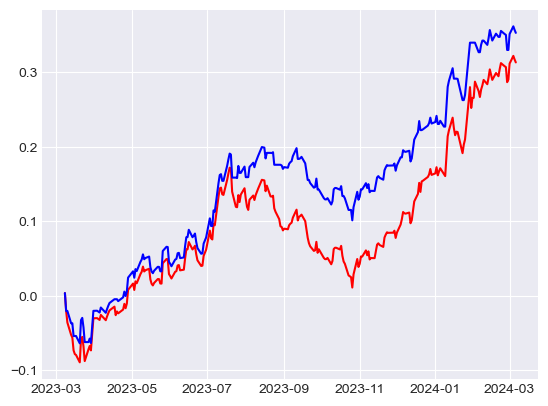

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Cum_Strategy'],color='blue')
